In [1]:
import pandas as pd

# 讀取 CSV 檔案
data = pd.read_csv('affairs.csv')

# 檢查資料的前幾行與基本資訊
print(data.head())
print(data.info())


   affairs  gender   age  yearsmarried children  religiousness  education  \
0       12  female  32.0          10.0      yes              3         17   
1       12    male  37.0          15.0      yes              4         14   
2       12  female  42.0          15.0      yes              5          9   
3       12    male  37.0          10.0      yes              2         20   
4       12  female  32.0          15.0      yes              3         14   

   occupation  rating  
0           5       2  
1           5       2  
2           4       1  
3           6       2  
4           1       2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 n

In [2]:
from sklearn.model_selection import train_test_split

# 將 `affairs` 轉換為二元分類 (0: 無外遇, 1: 有外遇)
data['affairs'] = (data['affairs'] > 0).astype(int)

# 將類別型特徵轉換為數值型
data = pd.get_dummies(data, columns=['gender', 'children'], drop_first=True)

# 分離特徵與目標
X = data.drop('affairs', axis=1)  # 特徵矩陣
y = data['affairs']              # 目標向量

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("訓練集大小:", X_train.shape)
print("測試集大小:", X_test.shape)


訓練集大小: (480, 8)
測試集大小: (121, 8)


使用 DecisionTreeClassifier 建立模型，並使用訓練資料進行訓練

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 建立決策樹模型
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 訓練模型
model_dt.fit(X_train, y_train)

# 預測測試集
y_test_pred = model_dt.predict(X_test)


### 評估模型的準確率、混淆矩陣以及其他效能指標

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 計算準確率
accuracy = accuracy_score(y_test, y_test_pred)
print(f"模型準確率: {accuracy:.2f}")

# 混淆矩陣
cm = confusion_matrix(y_test, y_test_pred)
print("混淆矩陣:")
print(cm)

# 詳細報告
print("分類報告:")
print(classification_report(y_test, y_test_pred))


模型準確率: 0.73
混淆矩陣:
[[79  8]
 [25  9]]
分類報告:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        87
           1       0.53      0.26      0.35        34

    accuracy                           0.73       121
   macro avg       0.64      0.59      0.59       121
weighted avg       0.69      0.73      0.69       121



### 5. 特徵重要性分析
檢查哪些特徵對模型的決策最重要

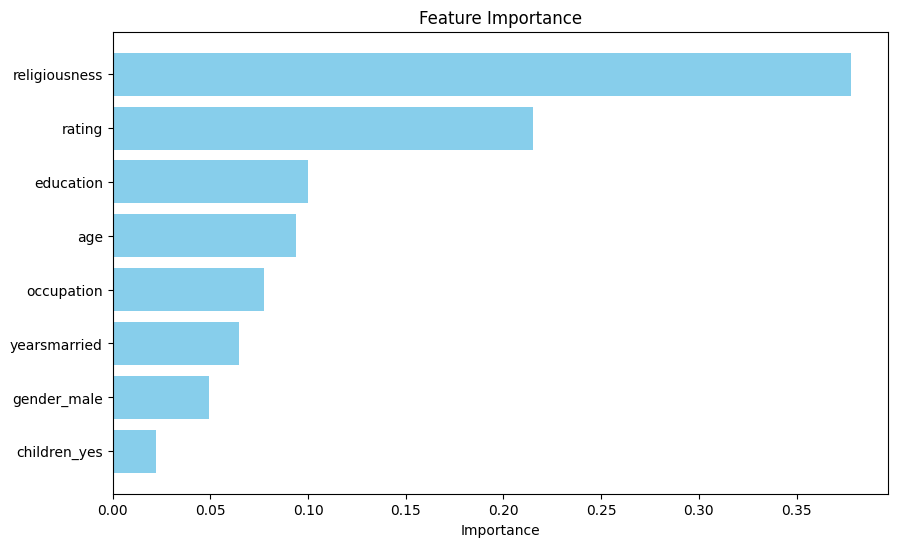

In [5]:
import matplotlib.pyplot as plt

# 特徵重要性
feature_importances = model_dt.feature_importances_
feature_names = X.columns

# 繪製特徵重要性條形圖
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


#### 6. 視覺化決策樹
使用 plot_tree 將決策樹結構可視化，幫助理解模型的決策過程

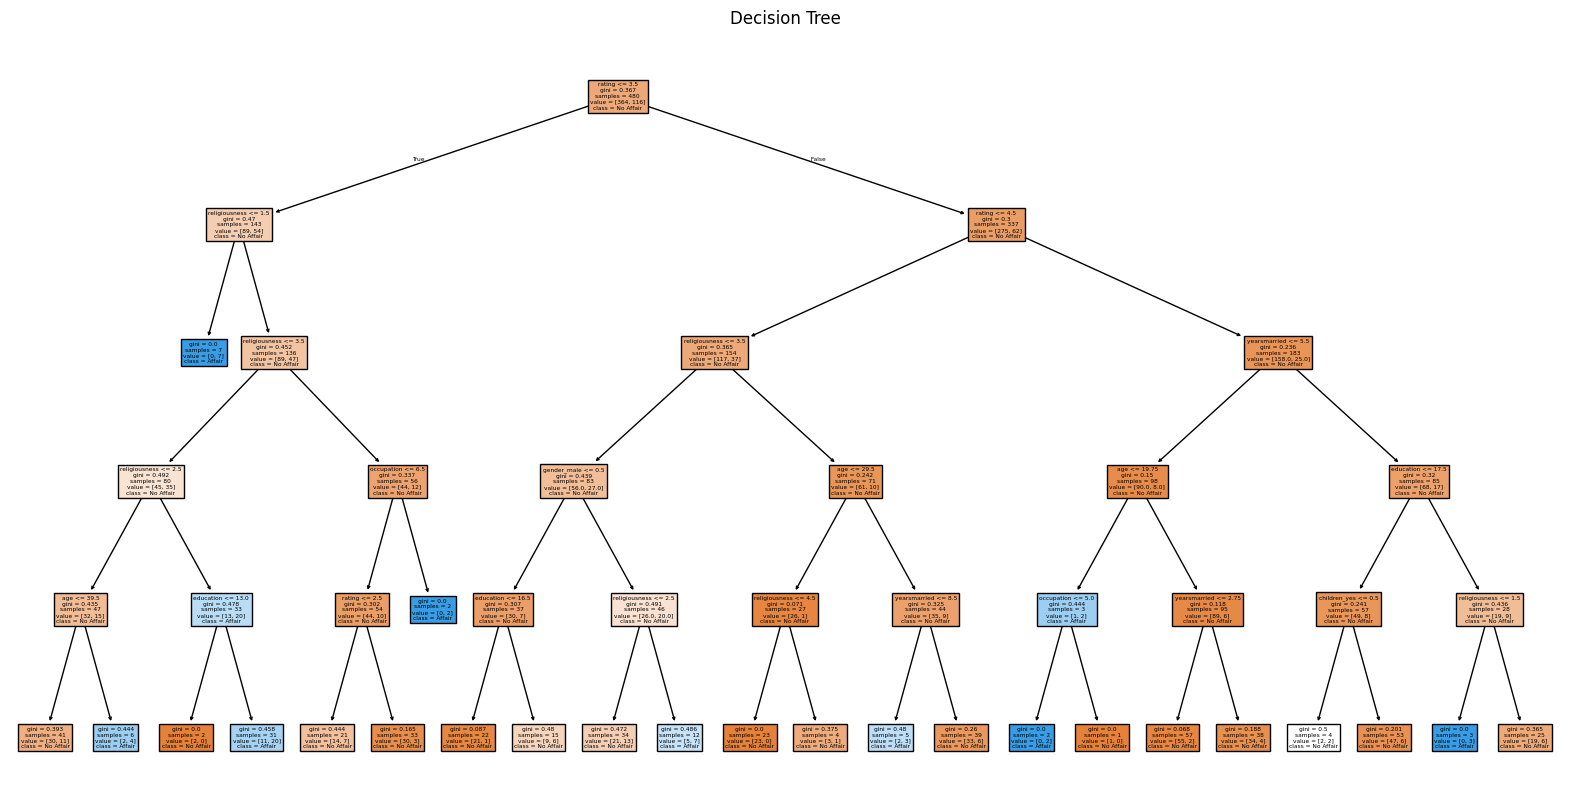

In [6]:
from sklearn.tree import plot_tree

# 繪製決策樹
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=['No Affair', 'Affair'], filled=True)
plt.title("Decision Tree")
plt.show()


### 使用 GridSearchCV 進行超參數調整
進一步優化模型的超參數

In [7]:
from sklearn.model_selection import GridSearchCV

# 定義超參數範圍
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# 使用 GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 最佳參數與最佳分數
print("最佳參數:", grid_search.best_params_)
print("最佳分數:", grid_search.best_score_)

# 使用最佳模型進行測試
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)

# 評估最佳模型
accuracy_best = accuracy_score(y_test, y_test_pred_best)
print(f"最佳模型準確率: {accuracy_best:.2f}")


最佳參數: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
最佳分數: 0.7479166666666667
最佳模型準確率: 0.74
